In [61]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


# Hierarchical clustering on drawings with vectors extracted from VGG19 for all kids

In [75]:
####################################
# To get the data If you're in Colab
####################################

# Images are storage in GitHub. By running this we clone the data into Colab
#! git-force-clone https://github.com/ClintJensen/CovNet_Human_Drawings
! git clone https://github.com/ClintJensen/CovNet_Human_Drawings
# Run this just once per sesion

# Now repo data is available in Colab local environment
!ls CovNet_Human_Drawings/data

/bin/bash: git-force-clone: command not found
cluster-dataframes   dap-metadata-kids	merged-dataframes-prediction
dap-drawings-adults  DAP_NEXT_Images	optimization-results
dap-drawings-all     edit-csv		README.md
dap-drawings-kids    edit-filenames	vectors-features


In [63]:
!ls CovNet_Human_Drawings/data/vectors-features

vgg19_vectors_drawings_block5_pool_adults.rar
vgg19_vectors_drawings_block5_pool_all_305_raw.npy
vgg19_vectors_drawings_block5_pool_all_305_raw.npy.zip
vgg19_vectors_drawings_block5_pool_all.rar
vgg19_vectors_drawings_block5_pool_kids_257_raw.npy
vgg19_vectors_drawings_block5_pool_kids_257_raw.zip
vgg19_vectors_drawings_block5_pool_kids.rar
x_matrix_kids_norm_226.npy
y_vector_kids_226.npy


In [64]:
# to import filenames
from os import listdir
from os.path import isfile, join

# to do hierarchical clustering
from scipy.cluster.hierarchy import dendrogram, linkage  
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering

# to handle data
import numpy as np

In [76]:
#################################
# Load vector features from VGG19
#################################

# WARNING: this works assuming that you are in the CovNet_Human_Drawings/code directory
# otherwise change path_np appropriately
#/vgg19_vectors_drawings_block5_pool_all_305_raw.npy
#/content/drive/MyDrive/Colab Notebooks/vgg19_vectors_drawings_block5_pool_all_305_raw.npy
#/content/CovNet_Human_Drawings/data/vectors-features/vgg19_vectors_drawings_block5_pool_all_305_raw.npy

#path_np = '../content/CovNet_Human_Drawings/data/vectors-features/'
path_np = '../content/drive/MyDrive/Colab Notebooks/'
filename = 'vgg19_vectors_drawings_block5_pool_all_305_raw.npy'

vgg19_feature_list_np = np.load(path_np+filename)
vgg19_feature_list_np.shape # (305, 25088)

(305, 25088)

In [77]:
# Get the drawings filenames from directory 

# If relative path doesn't work, change path as nedeed
path = '../content/CovNet_Human_Drawings/data/DAP_NEXT_Images/'
filenames = [f for f in listdir(path) if isfile(join(path, f))]
len(filenames) # This should yield 305

305

In [98]:
filenames

['DAM035_T_DAPedit.jpg',
 'DAMa017_T_DAPedit.jpg',
 'DAM073_F_DAPedit.jpg',
 'DAM081_F_DAPedit.jpg',
 'DAM011_P_DAPedit.jpg',
 'DAM020_T_DAPedit.jpg',
 'DAM028_F_DAPedit.jpg',
 'DAMa020_T_DAPedit.jpg',
 'DAM015_P_DAPedit.jpg',
 'DAM050_T_DAPedit.jpg',
 'DAM3D067_P_DAPedit.jpg',
 'DAM029_P_DAPedit.jpg',
 'DAM3D040_T_DAPedit.jpg',
 'DAM3D039_T_DAPedit.jpg',
 'DAMa018_T_DAPedit.jpg',
 'DAM025_T_DAPedit.jpg',
 'DAMa011_T_DAPedit.jpg',
 'DAM009_T_DAPedit.jpg',
 'DAMa015_F_DAPedit.jpg',
 'DAM026_P_DAPedit.jpg',
 'DAM079_P_DAPedit.jpg',
 'DAM008_P_DAPedit.jpg',
 'DAM030_P_DAPedit.jpg',
 'DAM024_P_DAPedit.jpg',
 'DAM072_T_DAPedit.jpg',
 'DAM064_P_DAPedit.jpg',
 'DAMa024_F_DAPedit.jpg',
 'DAM043_T_DAPedit.jpg',
 'DAM006_T_DAPedit.jpg',
 'DAM012_F_DAPedit.jpg',
 'DAM3D063_F_DAPedit.jpg',
 'DAM049_P_DAPedit.jpg',
 'DAM016_P_DAPedit.jpg',
 'DAM025_F_DAPedit.jpg',
 'DAM036_P_DAPedit.jpg',
 'DAM3D005_T_DAPedit.jpg',
 'DAMa025_F_DAPedit.jpg',
 'DAM011_F_DAPedit.jpg',
 'DAMa023_F_DAPedit.jpg',
 'DAM05

In [99]:
file_list = filenames

from tkinter import Tcl
Tcl().call('lsort', '-dict', file_list)

('DAM001_F_DAPedit.jpg',
 'DAM001_P_DAPedit.jpg',
 'DAM001_T_DAPedit.jpg',
 'DAM002_F_DAPedit.jpg',
 'DAM002_P_DAPedit.jpg',
 'DAM002_T_DAPedit.jpg',
 'DAM003_F_DAPedit.jpg',
 'DAM003_P_DAPedit.jpg',
 'DAM003_T_DAPedit.jpg',
 'DAM3D002_P_DAPedit.jpg',
 'DAM3D003_F_DAPedit.jpg',
 'DAM3D005_T_DAPedit.jpg',
 'DAM3D006_P_DAPecit.jpg',
 'DAM3D007_P_DAPedit.jpg',
 'DAM3D008_T_DAPedit.jpg',
 'DAM3D009_T_DAPedit.jpg',
 'DAM3D011_P_DAPedit.jpg',
 'DAM3D012_P_DAPedit.jpg',
 'DAM3D013_T_DAPedit.jpg',
 'DAM3D014_T_DAPedit.jpg',
 'DAM3D015_P_DAPedit.jpg',
 'DAM3D018_F_DAPedit.jpg',
 'DAM3D020_T_DAPedit.jpg',
 'DAM3D021_P_DAPedit.jpg',
 'DAM3D022_F_DAPedit.jpg',
 'DAM3D023_F_DAPedit.jpg',
 'DAM3D025_T_DAPedit.jpg',
 'DAM3D026_DAPedit.jpg',
 'DAM3D027_T_DAPedit.jpg',
 'DAM3D029_P_DAPedit.jpg',
 'DAM3D030_F_DAPedit.jpg',
 'DAM3D031_T_DAPedit.jpg',
 'DAM3D032_T_DAPedit.jpg',
 'DAM3D033_T_DAPedit.jpg',
 'DAM3D036_T_DAPedit.jpg',
 'DAM3D037_F_DAPedit.jpg',
 'DAM3D038_T_DAPedit.jpg',
 'DAM3D039_T_DAPedit.

In [97]:
vgg19_feature_list_np

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

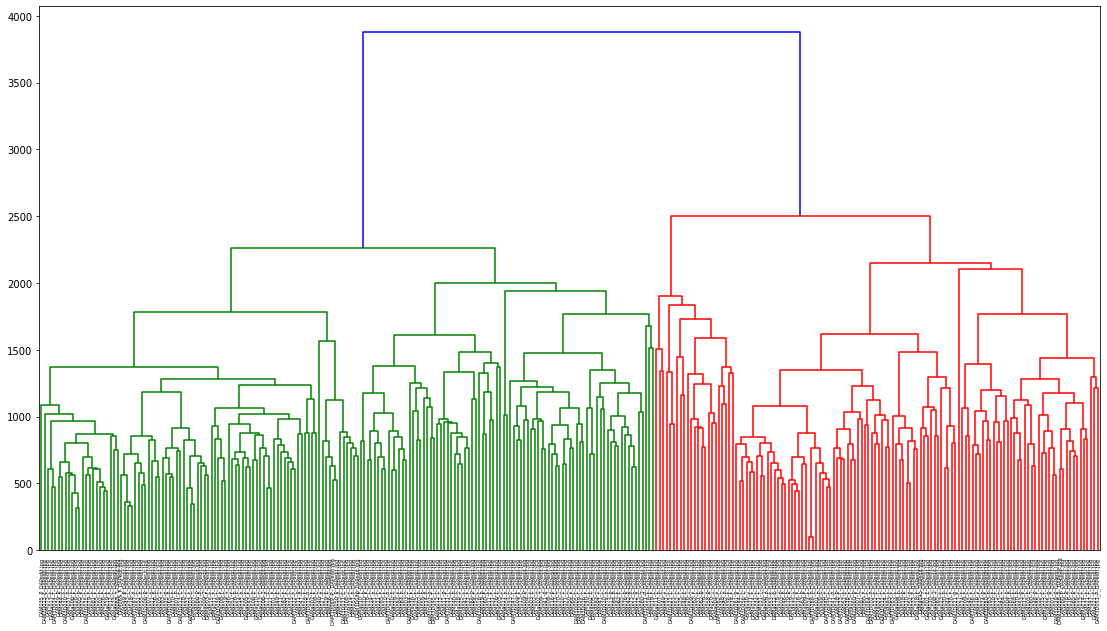

In [78]:
###############################################
#Plot a dendogram to do hierarchical clustering
###############################################

# Let's use the 'ward' method to compute the distance between clusters which 
# minimize the variance between clusters
linked = linkage(vgg19_feature_list_np, 'ward')

# Use filenames as label list
labelList = filenames

# Plot the dendogram as a descending tree
plt.figure(figsize=(19, 10))  
dendrogram(linked,  
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()  

In [79]:
# Based on the dendogram, it looks like we have 7 clusters
# Let's use sklearn to perform the hierarchical clustering

k = 7
hclustering = AgglomerativeClustering(n_clusters = k, affinity='euclidean', linkage='ward')
hclustering.fit(vgg19_feature_list_np)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=7)

In [80]:
# Print the cluster to which each image was assigned to
print(hclustering.labels_)  

[0 0 1 1 6 0 1 2 0 0 1 1 4 1 6 2 2 0 4 1 4 4 4 3 3 6 4 1 1 1 4 1 0 1 1 0 6
 6 4 1 4 6 1 3 1 1 0 1 1 1 0 1 4 0 0 1 4 6 3 0 4 1 1 1 1 0 4 0 1 2 1 1 3 1
 0 1 0 1 0 2 1 3 1 1 4 0 0 3 4 3 1 2 3 1 6 4 1 6 1 1 2 4 1 4 6 4 4 4 3 1 0
 6 1 4 1 4 2 4 0 4 1 6 4 6 0 4 6 3 4 3 4 2 1 0 2 2 0 1 1 4 4 6 3 6 3 4 3 4
 0 6 4 1 3 0 4 2 1 0 4 0 3 4 6 3 4 1 3 3 1 0 1 1 6 1 3 1 2 4 3 4 1 6 1 5 3
 4 1 1 4 1 4 6 0 4 1 0 1 6 1 6 3 3 0 4 4 1 2 6 1 4 0 4 4 2 3 4 1 6 1 2 3 1
 4 1 4 2 4 0 3 1 6 1 1 3 4 0 4 3 0 0 6 3 1 4 1 3 6 1 4 4 1 1 1 3 1 6 6 1 6
 3 4 6 1 1 3 2 1 4 4 6 2 0 3 2 6 4 0 1 3 6 3 0 1 6 1 0 1 3 1 3 1 2 1 1 6 6
 2 2 6 6 6 0 4 0 4]


## Plotting drawings by cluster

In [81]:
# To plot
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.pyplot import figure
%matplotlib inline

# to handle data
import pandas as pd

In [82]:
# First, let's create a pandas dataframe 
# this is necessary to plot the images by cluster later

# get filenames as a numpy aray
filenames_np = np.asarray(filenames)

# get cluster labels as a numpr array
clusters_np = hclustering.labels_

# create pandas dataframe stacking numpy arrays by column
drawings_df = pd.DataFrame({'filenames_np':filenames_np, 'clusters_np':clusters_np})

print(type(drawings_df))
print("Shape: ", drawings_df.shape)
print(drawings_df.head())

<class 'pandas.core.frame.DataFrame'>
Shape:  (305, 2)
            filenames_np  clusters_np
0   DAM035_T_DAPedit.jpg            0
1  DAMa017_T_DAPedit.jpg            0
2   DAM073_F_DAPedit.jpg            1
3   DAM081_F_DAPedit.jpg            1
4   DAM011_P_DAPedit.jpg            6


In [83]:
# Let's subset the dataframe into 5 samller dataframes by cluster group

def subCluster(subcluster):
    '''Function to subset dataframes by cluster'''
    cluster = drawings_df.loc[drawings_df['clusters_np'] == subcluster]
    return cluster


cluster_1 = subCluster(0)
print("Length cluster 1: ", len(cluster_1))
print(cluster_1.head())

cluster_2 = subCluster(1)
print("Length cluster 2: ", len(cluster_2))
print(cluster_2.head())

cluster_3 = subCluster(2)
print("Length cluster 3: ", len(cluster_3))
print(cluster_3.head())

cluster_4 = subCluster(3)
print("Length cluster 4: ", len(cluster_4))
print(cluster_4.head())

cluster_5 = subCluster(4)
print("Length cluster 5: ", len(cluster_5))
print(cluster_5.head())

cluster_6 = subCluster(5)
print("Length cluster 6: ", len(cluster_6))
print(cluster_6.head())

cluster_7 = subCluster(6)
print("Length cluster 7: ", len(cluster_7))
print(cluster_7.head())

Length cluster 1:  44
            filenames_np  clusters_np
0   DAM035_T_DAPedit.jpg            0
1  DAMa017_T_DAPedit.jpg            0
5   DAM020_T_DAPedit.jpg            0
8   DAM015_P_DAPedit.jpg            0
9   DAM050_T_DAPedit.jpg            0
Length cluster 2:  92
              filenames_np  clusters_np
2     DAM073_F_DAPedit.jpg            1
3     DAM081_F_DAPedit.jpg            1
6     DAM028_F_DAPedit.jpg            1
10  DAM3D067_P_DAPedit.jpg            1
11    DAM029_P_DAPedit.jpg            1
Length cluster 3:  23
              filenames_np  clusters_np
7    DAMa020_T_DAPedit.jpg            2
15    DAM025_T_DAPedit.jpg            2
16   DAMa011_T_DAPedit.jpg            2
69  DAM3D062_F_DAPedit.jpg            2
79   DAMa004_T_DAPedit.jpg            2
Length cluster 4:  40
            filenames_np  clusters_np
23  DAM024_P_DAPedit.jpg            3
24  DAM072_T_DAPedit.jpg            3
43  DAM064_T_DAPedit.jpg            3
58  DAM074_F_DAPedit.jpg            3
72  DAM076_T_D

In [89]:
#########################################
# Function to save plots for each cluster
#########################################


def plotClusters(cluster, nrows, ncols, save_path, cluster_name):
    '''Plot images for a clusterin a grid.
     
     Arguments:
     cluster      -- cluster dtaframe name
     nrows        -- number of rows in the plot
     ncols        -- number of cols in the plot
     save_path    -- string path name to save plot
     cluster_name -- string name to save plot 
    '''
    assert isinstance(cluster, pd.DataFrame), "cluster is not pandas dataframe"
    assert isinstance(nrows, int)
    assert isinstance(ncols, int)
    assert isinstance(save_path, str)
    assert isinstance(cluster_name, str)
    
    # Image parameters
    width = 10
    height = 10
    fig=plt.figure(figsize=(18, 18)) 
    
    # We need to create a counter to loop over images and allocate 
    # the image in the right position in the grid
    pic_index = 0 
    
    # Loop over each pic and plot it in the the grid
    # .iterrows() is a method that works with pandas dataframes
    for index, row in (cluster.iterrows()): 
      pic_index += 1
      # Create grid to plot images
      fig.add_subplot(nrows, ncols, pic_index)
      img_path = path + row['filenames_np']
      img=mpimg.imread(img_path)
      imgplot = plt.imshow(img)
      # get rid off axis and grid within each pic
      plt.axis('off')
    #save_path = '../content/CovNet_Human_Drawings/figures/block5_layer_hc_all_305_7_clusters/'
    save_path = '../content/drive/MyDrive/Colab Notebooks/CovNet_Human_Drawings-master/figures/block5_layer_hc_all_305_7_clusters/'
    
    
    plt.savefig(save_path+cluster_name+'.png', bbox_inches='tight')
    plt.show()

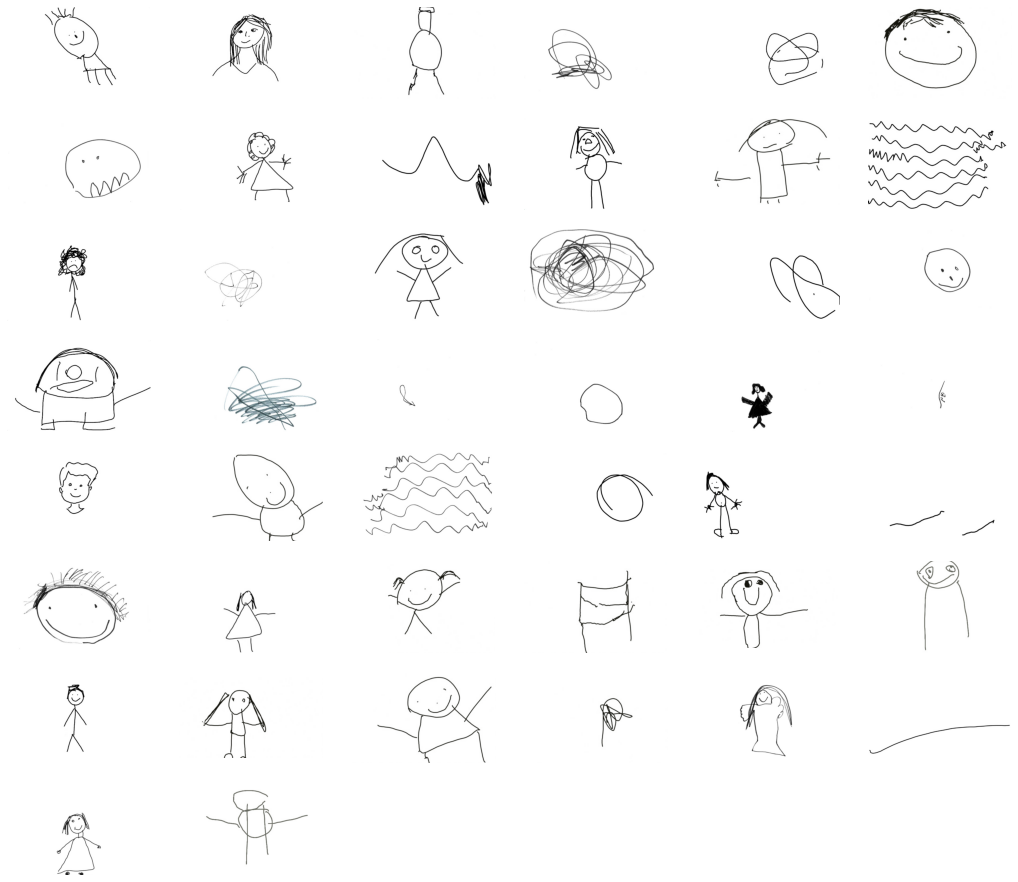

In [90]:
################
# Plot cluster 1
################

# pick the cluster to plot
cluster = cluster_1

# Define grid shape (for 53 images) 
nrows = 9
ncols = 6

# to save
#save_path = '../content/CovNet_Human_Drawings/figures/block5_layer_hc_all_305_7_clusters/'
save_path = '../content/drive/MyDrive/Colab Notebooks/CovNet_Human_Drawings-master/figures/block5_layer_hc_all_305_7_clusters/'
    

cluster_name = 'cluster_1'

# Function call to plot clusters
plotClusters(cluster, nrows, ncols, save_path, cluster_name)

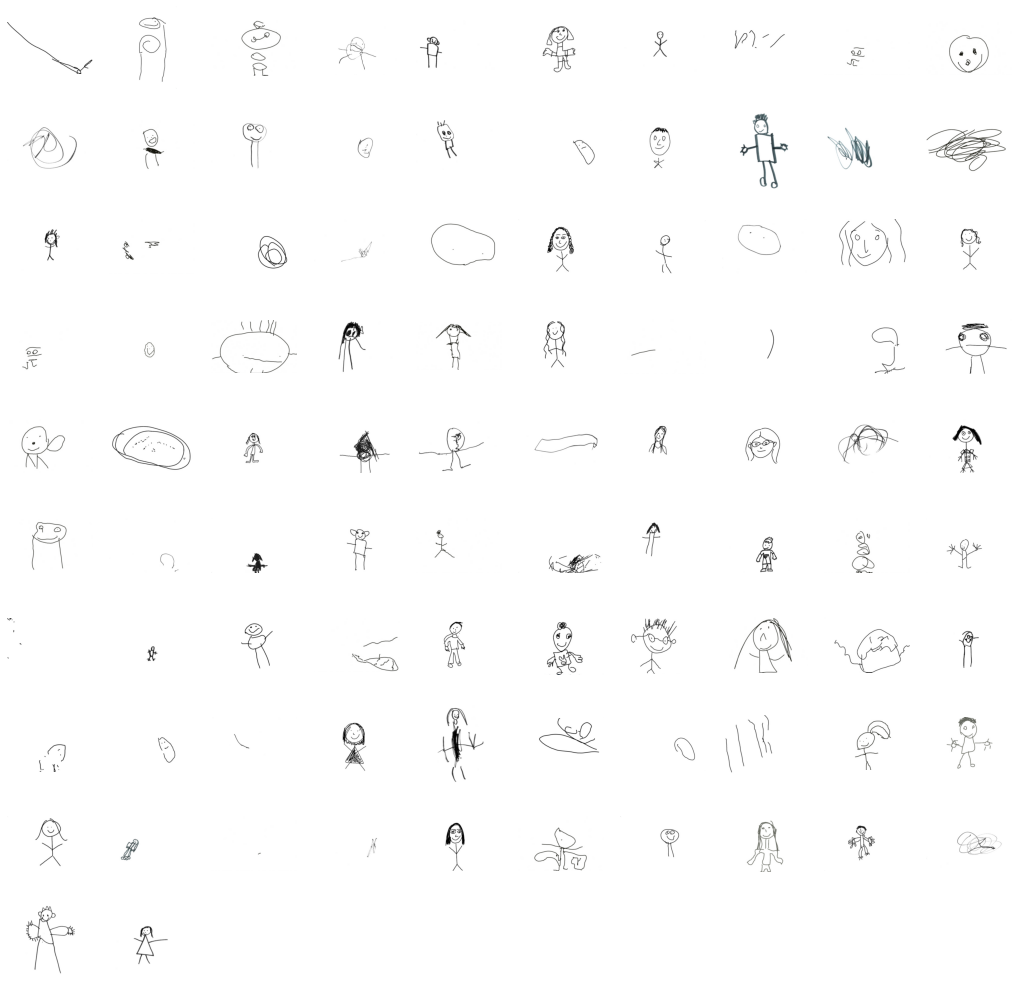

In [91]:
################
# Plot cluster 2
################

# pick the cluster to plot
cluster = cluster_2

# Define grid shape (for 76 images)
nrows = 10
ncols = 10

# to save
#save_path = '../content/CovNet_Human_Drawings/figures/block5_layer_hc_all_305_7_clusters/'
save_path = '../content/drive/MyDrive/Colab Notebooks/CovNet_Human_Drawings-master/figures/block5_layer_hc_all_305_7_clusters/'

cluster_name = 'cluster_2'

# Function call to plot clusters
plotClusters(cluster, nrows, ncols, save_path, cluster_name)

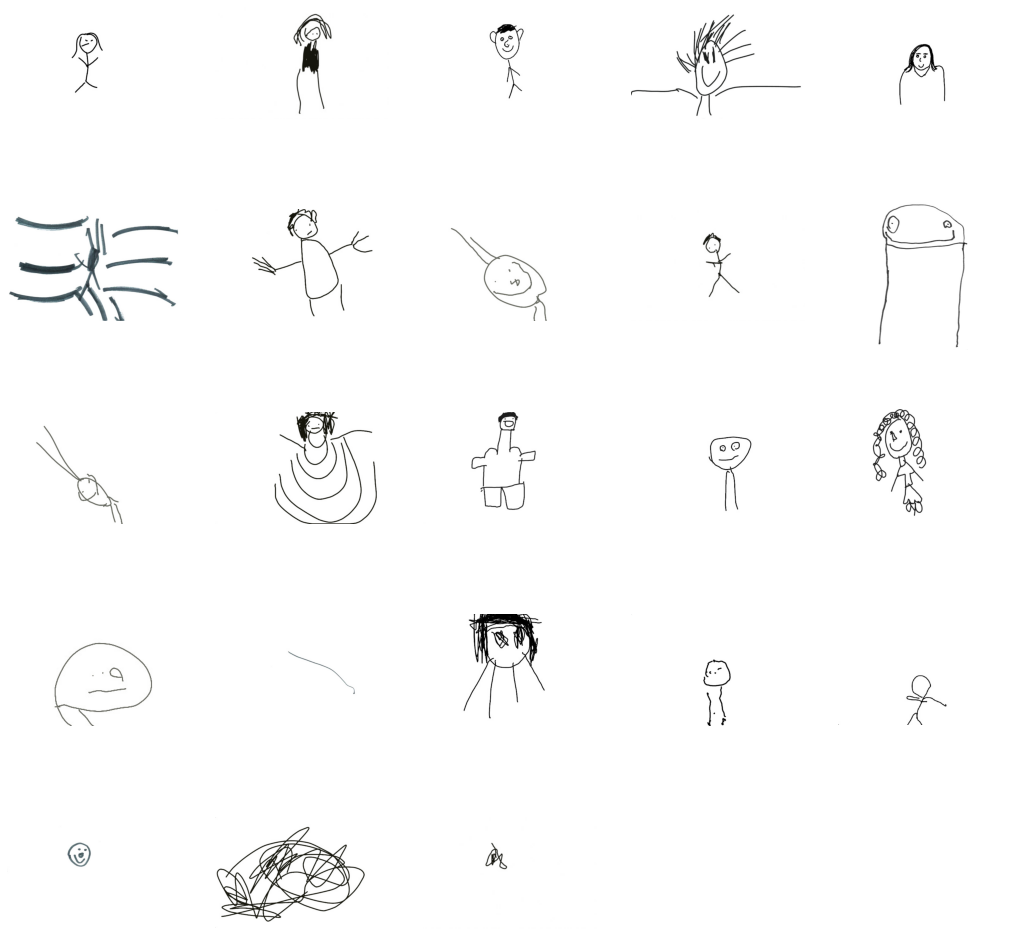

In [92]:
################
# Plot cluster 3
################

# pick the cluster to plot
cluster = cluster_3

# Define grid shape (for 16 images)
nrows = 5
ncols = 5

# to save
#save_path = '../content/CovNet_Human_Drawings/figures/block5_layer_hc_all_305_7_clusters/'
save_path = '../content/drive/MyDrive/Colab Notebooks/CovNet_Human_Drawings-master/figures/block5_layer_hc_all_305_7_clusters/'

cluster_name = 'cluster_3'

# Function call to plot clusters
plotClusters(cluster, nrows, ncols, save_path, cluster_name)

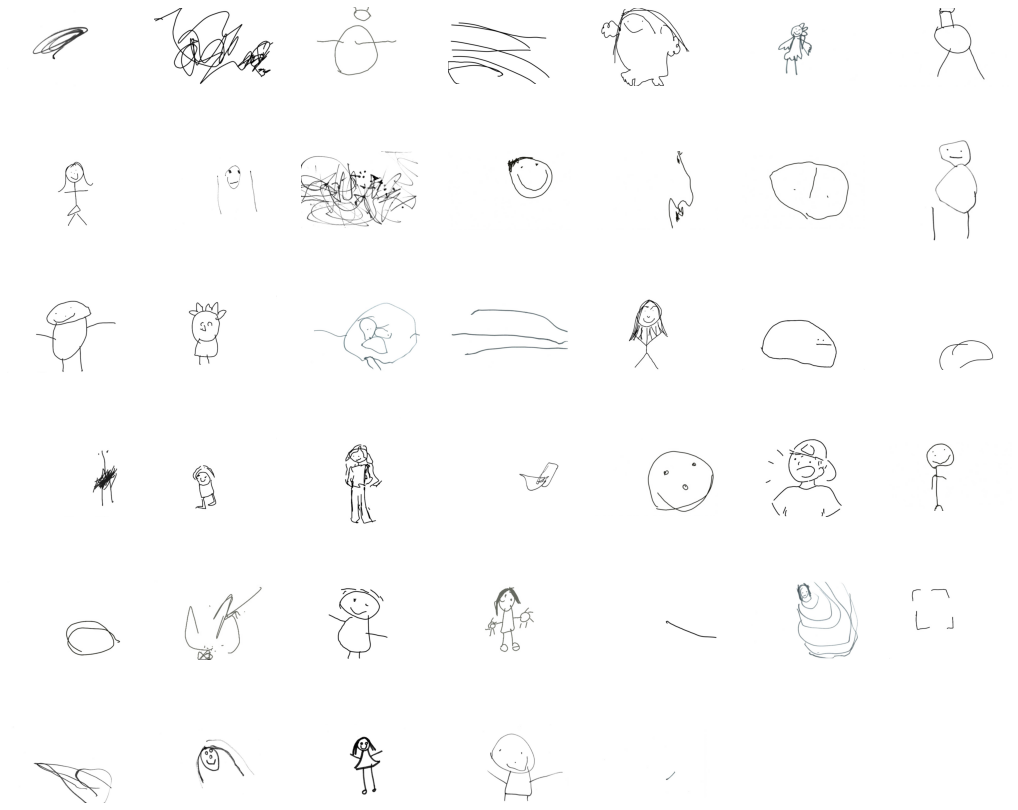

In [93]:
################
# Plot cluster 4
################

# pick the cluster to plot
cluster = cluster_4

# Define grid shape (for 1 image)
nrows = 7
ncols = 7

# to save
#save_path = '../content/CovNet_Human_Drawings/figures/block5_layer_hc_all_305_7_clusters/'
save_path = '../content/drive/MyDrive/Colab Notebooks/CovNet_Human_Drawings-master/figures/block5_layer_hc_all_305_7_clusters/'

cluster_name = 'cluster_4'

# Function call to plot clusters
plotClusters(cluster, nrows, ncols, save_path, cluster_name)

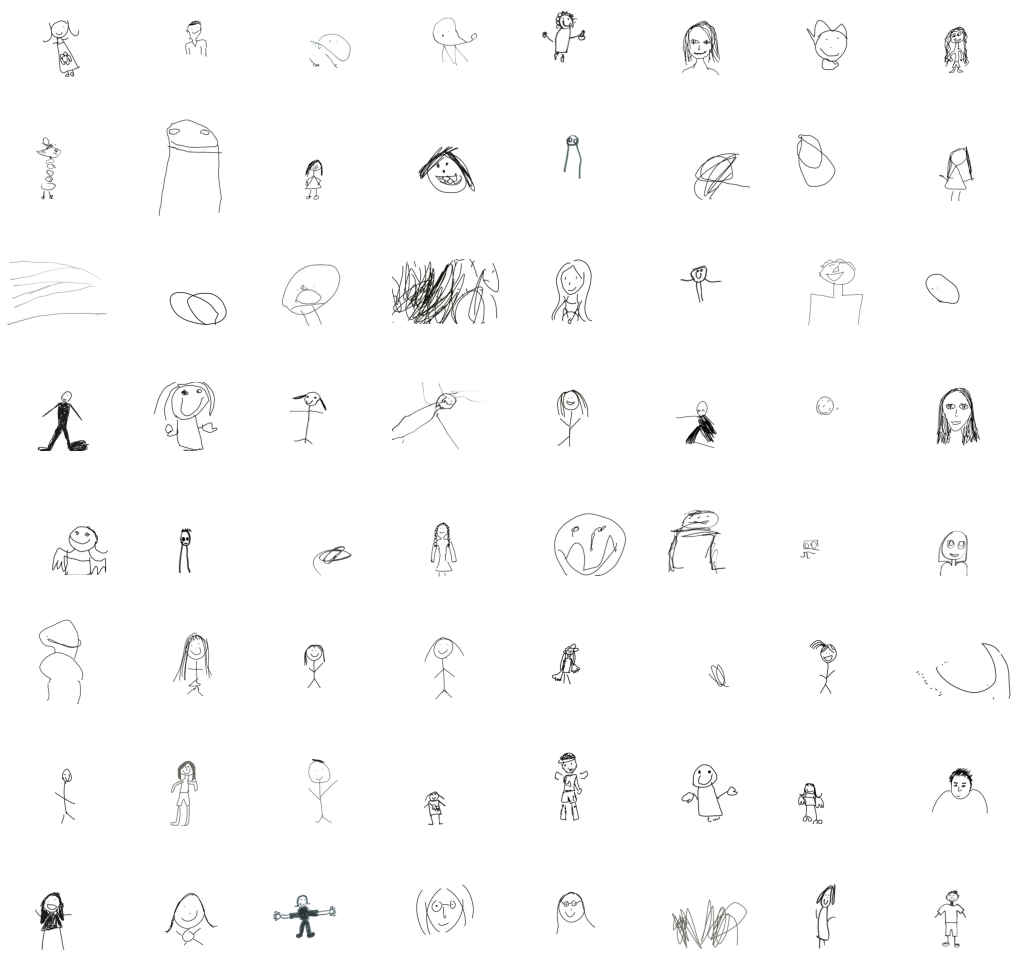

In [94]:
################
# Plot cluster 5
################

# pick the cluster to plot
cluster = cluster_5

# Define grid shape (for 22 images)
nrows = 8
ncols = 8

# to save
#save_path = '../content/CovNet_Human_Drawings/figures/block5_layer_hc_all_305_7_clusters/'
save_path = '../content/drive/MyDrive/Colab Notebooks/CovNet_Human_Drawings-master/figures/block5_layer_hc_all_305_7_clusters/'

cluster_name = 'cluster_5'

# Function call to plot clusters
plotClusters(cluster, nrows, ncols, save_path, cluster_name)

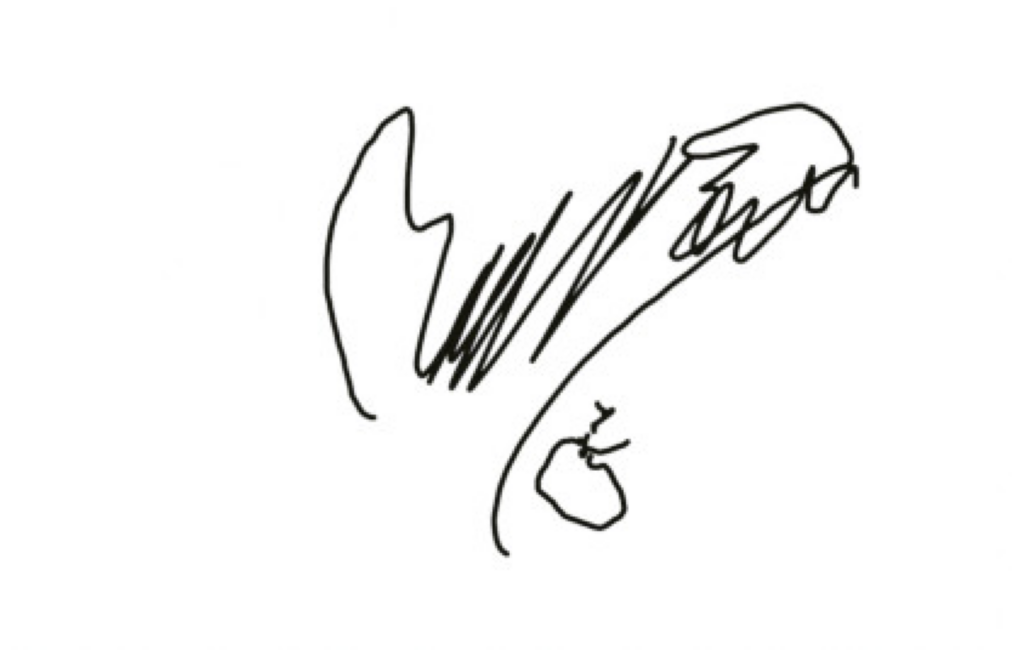

In [95]:
################
# Plot cluster 6
################

# pick the cluster to plot
cluster = cluster_6

# Define grid shape (for 86 images)
nrows = 1
ncols = 1

# to save
#save_path = '../content/CovNet_Human_Drawings/figures/block5_layer_hc_all_305_7_clusters/'
save_path = '../content/drive/MyDrive/Colab Notebooks/CovNet_Human_Drawings-master/figures/block5_layer_hc_all_305_7_clusters/'

cluster_name = 'cluster_6'

# Function call to plot clusters
plotClusters(cluster, nrows, ncols, save_path, cluster_name)

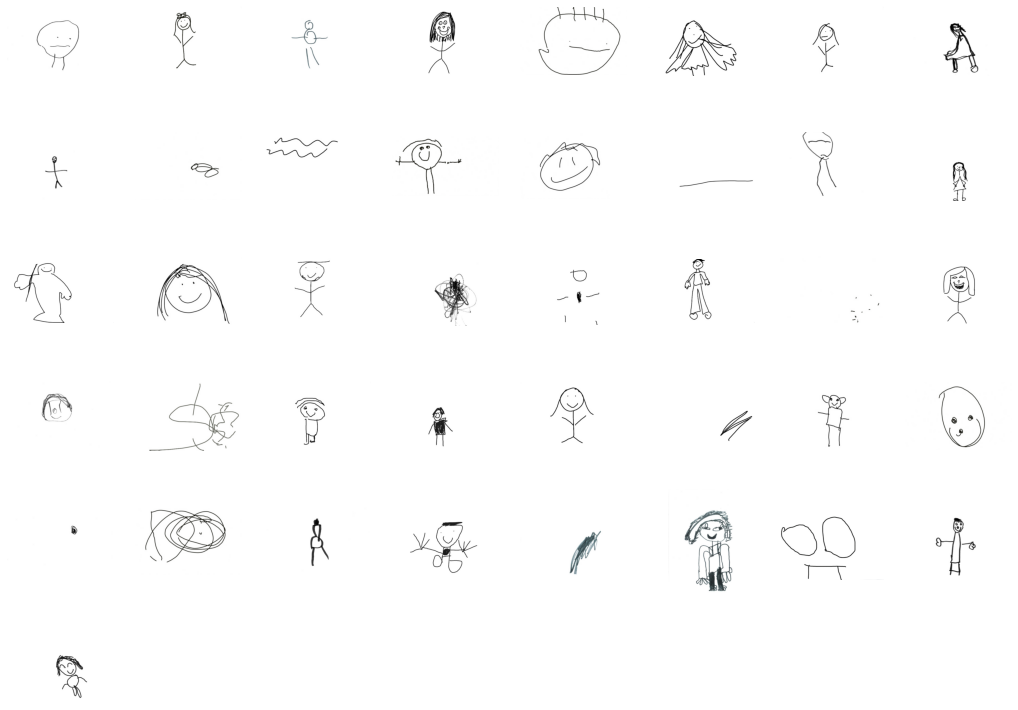

In [96]:
################
# Plot cluster 7
################

# pick the cluster to plot
cluster = cluster_7

# Define grid shape (for 3 images)
nrows = 8
ncols = 8

# to save
#save_path = '../content/CovNet_Human_Drawings/figures/block5_layer_hc_all_305_7_clusters/'
save_path = '../content/drive/MyDrive/Colab Notebooks/CovNet_Human_Drawings-master/figures/block5_layer_hc_all_305_7_clusters/'

cluster_name = 'cluster_7'

# Function call to plot clusters
plotClusters(cluster, nrows, ncols, save_path, cluster_name)